name: Patrick Doran  
Studentid: 21261768

# Lab 1: Exploratory Data Analysis (EDA)

This lab exercise demonstrates EDA of an example dataset with the Python modules `Pandas`, `Numpy`, `Matplotib` and `Seaborn`.

> "At a high level, EDA is the practice of using visual and quantitative methods to understand and summarize a dataset without making any assumptions about its contents. It is a crucial step to take before diving into machine learning or statistical modeling because it provides the context needed to develop an appropriate model for the problem at hand and to correctly interpret its results."
> <a href="https://www.svds.com/value-exploratory-data-analysis/">Chloe Mawer</a> 

## A. Importing Modules and Dataset

In [1]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bank Data Set

### Goal is to classify if the client will subscribe a term deposit (variable y)

# bank client data:
1 - age (numeric)  
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5 - default: has credit in default?   (categorical: 'no','yes','unknown')  
6 - housing: has housing loan? (categorical: 'no','yes','unknown')  
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:  
8 - contact: contact communication type (categorical: 'cellular','telephone')  
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14 - previous: number of contacts performed before this campaign and for this client (numeric)  
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)  
17 - cons.price.idx: consumer price index - monthly indicator (numeric)  
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)  
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)  
20 - nr.employed: number of employees - quarterly indicator (numeric)  

## T2.1 Formulate a particular Question that might be interesting to answer by exploring this dataset

I think there are a few interesting angles to explore in this data set. Banks in general are always trying to maximise profits. There are two ways to do this increase revenues or decrease costs. So we want to look at the accounts that haven't subscribed and see if there are any customers that would subscribe given additional attention (this would help to increase revenues). We do want to be careful in who we target as if we target leads who have not got the means to subscribe this would be time wastes thus it would be money wasted. 

1) Which of the accounts are most likely to commit to a term deposit?  
2) Have the bank missed out on securing more term deposits?  
3) Have the bank wasted resources in contacting accounts which are unlikely to commit to a term deposit?  
4) How can the bank maximise profitability?

In [2]:
bank = pd.read_csv('bank.csv')
bank

age           job   marital  education default  balance housing loan  \
0     32.0    technician    single   tertiary      no      392     yes   no   
1     39.0    technician  divorced  secondary      no      688     yes  yes   
2     59.0       retired   married  secondary      no     1035     yes  yes   
3     47.0   blue-collar   married  secondary      no      398     yes  yes   
4     54.0       retired   married  secondary      no     1004     yes   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
1995  20.0       student    single        NaN      no     2785      no   no   
1996  28.0        admin.    single  secondary      no      127      no   no   
1997  81.0       retired   married    primary      no     1154      no   no   
1998  46.0      services   married    primary      no     4343     yes   no   
1999  40.0  entrepreneur   married  secondary      no     6403      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0      cellular    1   apr       957         2    131         2  failure   
1      cellular    1   apr       233         2    133         1  failure   
2      cellular    1   apr       126         2    239         1  failure   
3      cellular    1   apr       274         1    238         2  failure   
4      cellular    1   apr       479         1    307         1  failure   
...         ...  ...   ...       ...       ...    ...       ...      ...   
1995   cellular   16   sep       327         2     -1         0      NaN   
1996   cellular   16   sep      1334         2     -1         0      NaN   
1997  telephone   17   sep       231         1     -1         0      NaN   
1998        NaN   20   sep       185         1     -1         0      NaN   
1999   cellular   22   sep       208         2     -1         0      NaN   

     subscribed  
0            no  
1            no  
2            no  
3            no  
4            no  
...         ...  
1995        yes  
1996        yes  
1997        yes  
1998        yes  
1999        yes  

[2000 rows x 17 columns]

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB


In [4]:
bank.describe()

age       balance          day     duration     campaign  \
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000   
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   
std      12.724358   3131.224213     9.712189   221.557295     1.378862   
min      18.000000   -980.000000     1.000000     7.000000     1.000000   
25%      32.000000    201.500000     5.000000   146.000000     1.000000   
50%      38.000000    551.000000    12.000000   236.000000     1.000000   
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   

             pdays     previous  
count  2000.000000  2000.000000  
mean    167.896000     2.561500  
std     131.754126     3.400735  
min      -1.000000     0.000000  
25%      75.750000     1.000000  
50%     182.000000     2.000000  
75%     251.000000     3.000000  
max     854.000000    55.000000

In [5]:
bank['subscribed'].value_counts()

no     1000
yes    1000
Name: subscribed, dtype: int64

This shows that 1000 of our 2000 accounts subscribed to the Term Deposit

### Filling in the blanks
I will fill in the missing age columns with the mean age. This won't have a major detrimental effect because it accounts for such a small proportion of the data set

In [6]:
bank['age'] = bank['age'].fillna(bank['age'].mean())

12 applicants are missing the age field

In [7]:
bank[bank['job'].isnull()]

age  job  marital  education default  balance housing loan    contact  \
255   42.0  NaN   single    primary      no     2398     yes   no   cellular   
257   46.0  NaN  married        NaN      no      677      no   no   cellular   
831   41.0  NaN   single    primary      no     2398     yes   no        NaN   
1223  55.0  NaN  married  secondary      no     2206      no   no   cellular   
1281  50.0  NaN  married        NaN      no      558      no   no   cellular   
1669  54.0  NaN  married  secondary      no     2206      no   no   cellular   
1711  77.0  NaN  married        NaN      no      397      no   no  telephone   
1801  28.0  NaN   single        NaN      no      326      no   no   cellular   
1868  48.0  NaN   single        NaN      no     1819      no   no   cellular   
1975  45.0  NaN  married   tertiary      no      406      no   no   cellular   

      day month  duration  campaign  pdays  previous poutcome subscribed  
255     3   feb       144         2    271         2  failure         no  
257     3   feb       425         1     82         1  failure         no  
831     8   may       287         2     -1         0      NaN         no  
1223   12   aug       265         1     91         5  success        yes  
1281    9   jul       464         1    683         6  failure        yes  
1669   13   may       260         1     91         4  success        yes  
1711    7   may       300         3     -1         0      NaN        yes  
1801   11   oct       450         1    231         1  success        yes  
1868    2   sep      1440         1    458         1  failure        yes  
1975    7   sep       314         1     -1         0      NaN        yes

Group by nulls and see if the missing data is coming from the same people

(array([1463.,    0.,    0.,  325.,    0.,    0.,  202.,    0.,    0.,
          10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

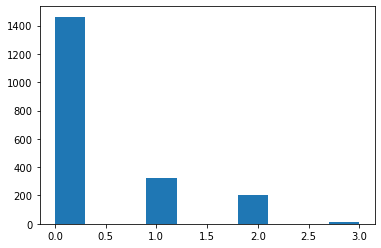

In [8]:
plt.hist(bank.isnull().sum(axis = 1))

This shows the amount of people missing various levels of data

## T2.2 Calculate Statistics for the numerical and categorical attributes, draw a short conclusion

### Corrolation Matrix with R_scores

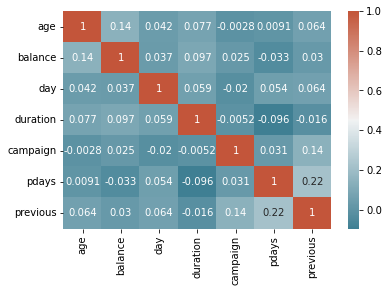

In [9]:
corr = sns.heatmap(bank.corr(), annot = True, 
                   cmap = sns.diverging_palette(220, 20, 
                   as_cmap = True))

I want to look at which information is most important for the Subscribed column, I will need to change this to binary 1, 0 instead of yes or no

In [10]:
bank['subscribed_binary'] = pd.Series(np.where(bank['subscribed'].values == 'yes', 1, 0),
          bank.index)
bank.head()

age          job   marital  education default  balance housing loan  \
0  32.0   technician    single   tertiary      no      392     yes   no   
1  39.0   technician  divorced  secondary      no      688     yes  yes   
2  59.0      retired   married  secondary      no     1035     yes  yes   
3  47.0  blue-collar   married  secondary      no      398     yes  yes   
4  54.0      retired   married  secondary      no     1004     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular    1   apr       957         2    131         2  failure   
1  cellular    1   apr       233         2    133         1  failure   
2  cellular    1   apr       126         2    239         1  failure   
3  cellular    1   apr       274         1    238         2  failure   
4  cellular    1   apr       479         1    307         1  failure   

  subscribed  subscribed_binary  
0         no                  0  
1         no                  0  
2         no                  0  
3         no                  0  
4         no                  0

Now I can add subscribed to my correlation matrix

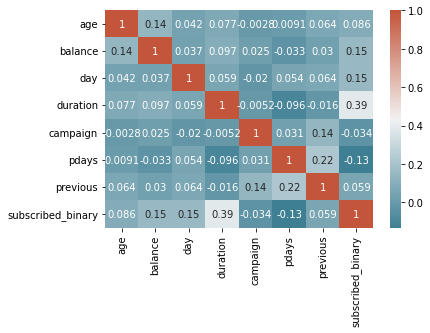

In [11]:
corr1 = sns.heatmap(bank.corr(), annot = True, 
                   cmap = sns.diverging_palette(220, 20, 
                   as_cmap = True))

It is interesting to see that duration has a bigger influence on the outcome than balance. I think the day some information such as day isn't relavent in this scenario.

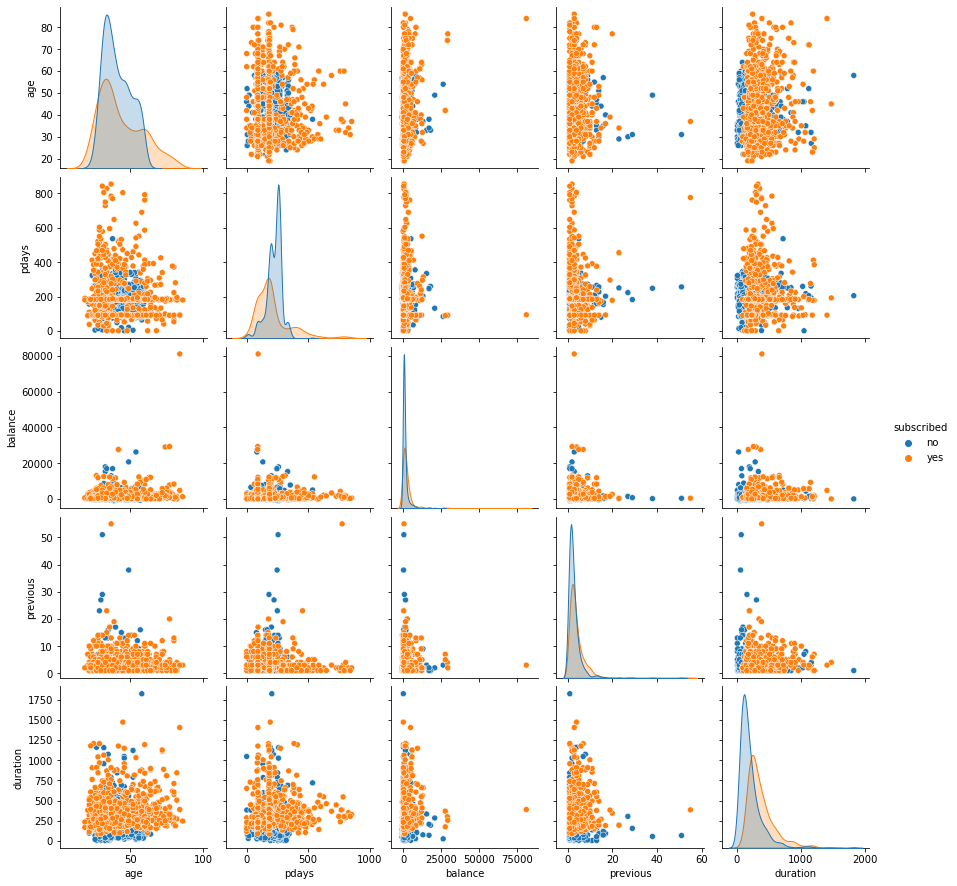

In [12]:
clean_bank = bank.dropna()
values = ['age', 'pdays', 'balance', 'previous', 'subscribed', 'duration']
sns.pairplot(data=clean_bank[values], hue = 'subscribed')

If you look at previous and balance plot,  you cans see that the marketing team have contacted a few account holders with very low balances a relatively large number of times. It seems that most account holders sign up within the first 20 calls. This would be a good point to stop calling.  

You can also see that there are a few account holders with large balances who have only been contacted a handful of times. These should be targeted.

In general it seems as though there are far more orange dots than brue dots. I should see if the proportion of subscribed now that we dropped NA

In [13]:
clean_bank['subscribed'].value_counts()

no     804
yes    659
Name: subscribed, dtype: int64

This shows, that the reasons for my suspicions were incorrect but, there are actually a larger number of none subscribed personel in the cleaned data. It makes me think that I should look into the discarded data categories in more detail

Text(0.5, 0.98, '')

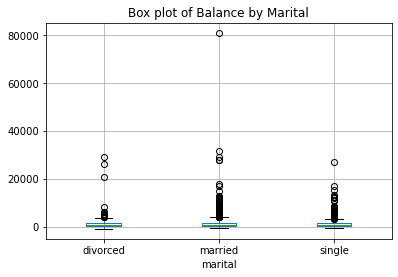

In [14]:
bank.boxplot(column = 'balance', by = 'marital')
plt.title('Box plot of Balance by Marital')
plt.suptitle("") 

We can see that in general divorced people have a much lower balance which would suggest they may be less willing to commit to a term desposit. But the correlation is very weak.

In [15]:
bank.groupby(['marital']).mean()

age      balance        day    duration  campaign       pdays  \
marital                                                                         
divorced  48.609302  1483.344186  14.832558  293.520930  1.865116  178.627907   
married   45.834405  1500.935194  13.288029  288.735374  1.911791  170.638164   
single    32.838297  1247.580119  14.467359  296.956973  1.919881  159.952522   

          previous  subscribed_binary  
marital                                
divorced  2.162791           0.437209  
married   2.752475           0.450945  
single    2.373887           0.600890

This shows that single people are more likely to sign on than married or divorced people

In [16]:
bank.groupby(['education']).mean()

age      balance        day    duration  campaign  \
education                                                            
primary    50.708539  1513.262673  12.419355  283.686636  1.953917   
secondary  41.264334  1220.836181  13.491457  288.656281  1.850251   
tertiary   39.172911  1667.609649  14.779240  296.770468  1.982456   

                pdays  previous  subscribed_binary  
education                                           
primary    154.050691  2.382488           0.387097  
secondary  177.808040  2.495477           0.453266  
tertiary   160.388889  2.782164           0.578947

This shows that people who studied in third level education are more likely to sign on

In [17]:
bank.groupby(['job']).mean()

age      balance        day    duration  campaign  \
job                                                                      
admin.         40.913980  1180.283401  13.380567  285.668016  1.821862   
blue-collar    39.760916   737.295302  12.466443  250.825503  1.946309   
entrepreneur   43.733333  1143.000000  13.400000  287.800000  1.888889   
housemaid      47.314286  2327.914286  13.914286  238.342857  2.085714   
management     40.206636  1768.227766  14.475054  288.806941  1.989154   
retired        66.893537  2792.456790  14.407407  381.358025  1.783951   
self-employed  39.754048  1251.734375  14.562500  322.687500  1.906250   
services       38.192443  1042.030303  12.321212  266.775758  1.854545   
student        25.841177  1591.760417  14.437500  374.781250  1.989583   
technician     40.298141  1199.683908  14.841954  267.318966  1.905172   
unemployed     39.405797  1158.028986  14.420290  355.028986  1.869565   

                    pdays  previous  subscribed_binary  
job                                                     
admin.         173.113360  2.546559           0.526316  
blue-collar    168.617450  2.221477           0.258389  
entrepreneur   145.911111  2.177778           0.333333  
housemaid      149.514286  2.542857           0.571429  
management     173.579176  3.010846           0.544469  
retired        139.648148  2.777778           0.839506  
self-employed  165.906250  2.406250           0.546875  
services       182.606061  2.133333           0.303030  
student        128.604167  1.989583           0.906250  
technician     173.974138  2.637931           0.413793  
unemployed     185.536232  2.492754           0.695652

This is very interesting, the highest proportions of sign on are in students, retired, and unemployed people. I was surprised by this as these are the people who aren't actively earning an income. They might see this as a form of income, as interest will increase the value of their money. I think it is important to note, that there are a relatively low number of students, retired and unemployed people in the data set this could be a reason for their subscription level being high, it might be better to do a weighted mean to acount for the differenced in numbers across the job titles. 

In [18]:
# getting value_counts for all feautres
for i in bank.columns:
    values_count = bank[i].value_counts()
    print(f'Feature: {i}\n{values_count}\n')

Feature: age
33.0    95
35.0    90
31.0    87
34.0    84
37.0    77
        ..
93.0     2
86.0     2
81.0     2
18.0     1
79.0     1
Name: age, Length: 69, dtype: int64

Feature: job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

Feature: marital
married     1111
single       674
divorced     215
Name: marital, dtype: int64

Feature: education
secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

Feature: default
no     1985
yes      15
Name: default, dtype: int64

Feature: balance
0       86
1        9
272      8
303      7
4        6
        ..
1057     1
5151     1
1053     1
1047     1
4873     1
Name: balance, Length: 1274, dtype: int64

Feature: housing
no     1037
yes     963
Name: housing, dtype: int64

Feature: loan
no     1750
yes     250
Nam

This gives me all of the value counts for all of the columns

#### Conclusion of statistical information
On first viewing it seems as though there is a greater correlation between the categorical data to those who have subscribed. My findings where would suggest that the bank should target students, retired, and un_employed people the most. I wonder if this could have a like with the amount of available time these people have in their day to day lives. There seems to be a link between the duration of the call and the sign on rate. Maybe there are some insights we could draw from these links.   

It seems as though there is no point in calling a certain customer more than 10 times, which could result in a saving for the bank. This could be considered the cut off point at which the marketing team no longer contact the customer.  

Based on my easly analysis, I think there is a good opportunity to gain more subscriptions and cut costs by targeting the customers most likely to sign on. 

## T2.3 Plot the Distribution of Numerical Attributes

pip install -U seaborn

In [19]:
def feature_explotation_num(data, feature, reference = 'subscribed'):
    
    
    
    f, axes = plt.subplots(1, 2, figsize = (16,6))
    
    
    #print(f'Feature: {feature}')
    crosstab = pd.crosstab(data[feature], data[reference])
    crosstab.plot(kind='hist', stacked=True, ax = axes[0])
    axes[0].title.set_text(f'Distribution of {feature}')
    
    sns.violinplot(x = data[reference], y = data[feature] ,  orient='v', ax = axes[1] )
    axes[1].title.set_text(f'Violin of {feature}')
    
    #plt.show
    
    return None

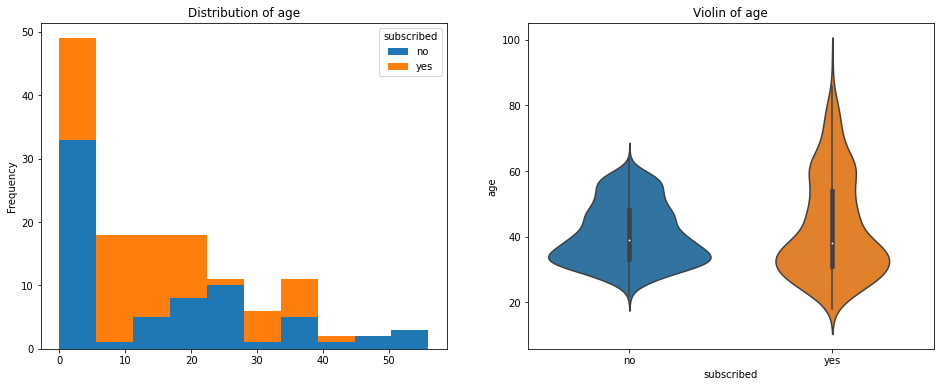

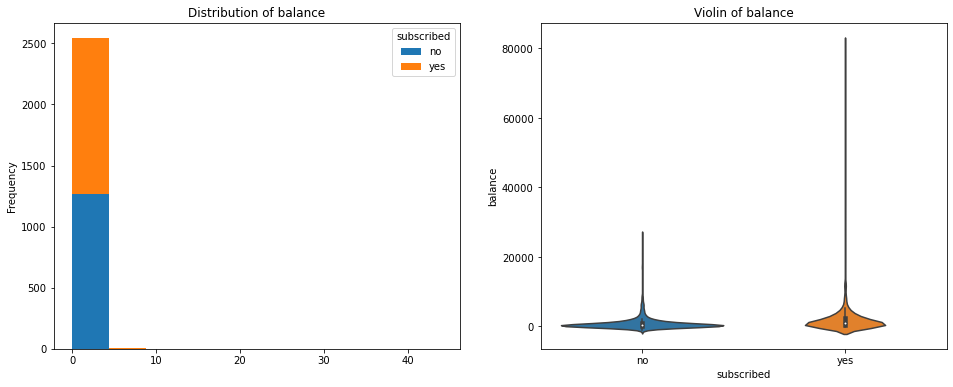

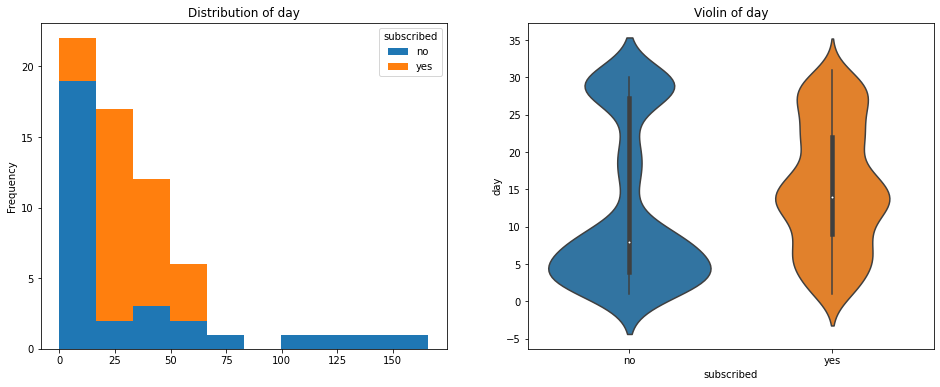

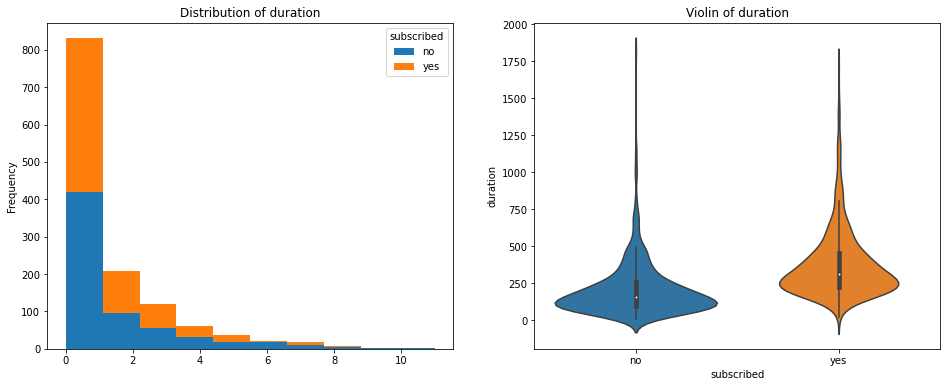

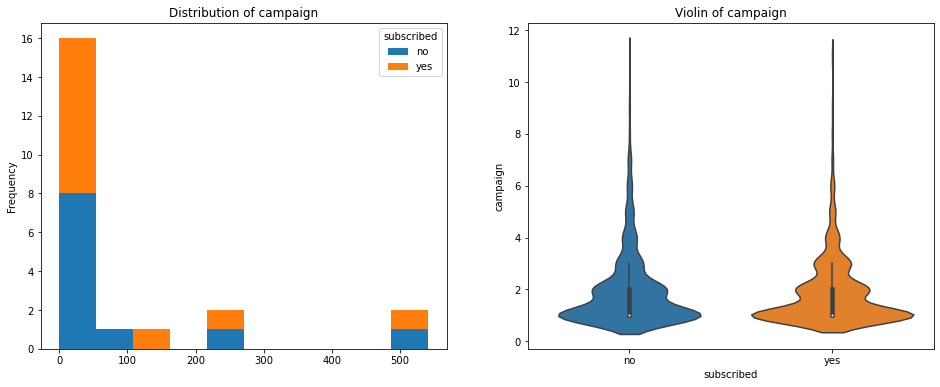

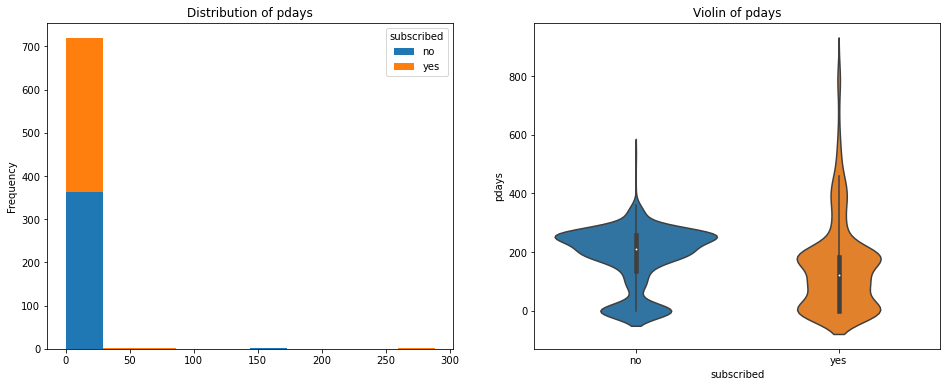

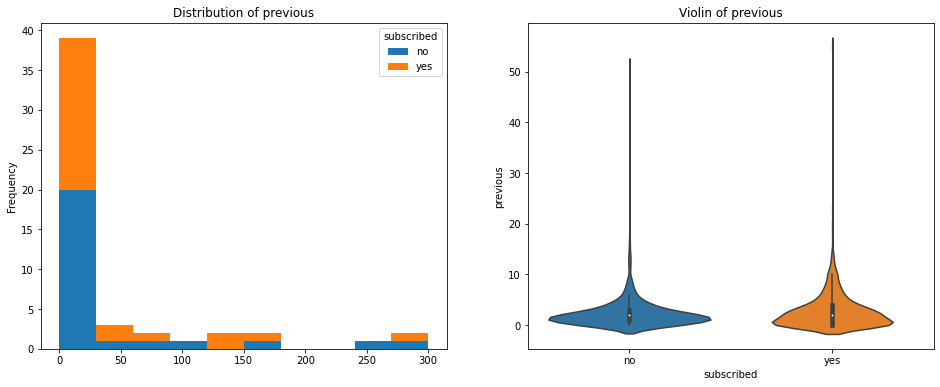

In [20]:
num_feature = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in num_feature:
    feature_explotation_num(bank, i)

On first look of the distributions it looks as though there is not any major correlation between any of the numerical data.  

Based on the distributions, I think that I should change how I have plotted my histograms. I think maybe I should try seaborn histogram. It seems to offer more flexibility and more accuracy than the matplotlib histogram implimentation.  

In general, I think I was looking for a clear and obvious difference between the subscribed and not subscribed distributions, but there was no glaringly obvious differences. Maybe when we use machine learning we may find a pattern in the data, but I'm not overly confident that a pattern exists in the numerical data. There a pattern where the extremes or median of a certain feature are more or less likely to sign on to the term deposit, but I cannot see it, so this analysis has not increased my understanding of the data and thus does not lead me to any answers when aiming to increase profitability. 

## Categorical Data Distribution

In [21]:
def feature_explotation_cat(data, feature, reference = 'subscribed'):
    
    f, axes = plt.subplots(1, 2, figsize = (16,6))
        
    #print(f'Feature: {feature}')
    crosstab = pd.crosstab(data[feature], data[reference])
    crosstab.plot(kind='bar', stacked=True, ax = axes[0])
    axes[0].title.set_text(f'Distribution of {feature}')
    
    pivot_table_feature = data.pivot_table(values=reference, 
                           index=feature, 
                           columns = data['housing'],
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
    sns.heatmap(pivot_table_feature, annot=True, cmap="YlGnBu", ax = axes[1])
    axes[1].title.set_text(f'Heatmap of {feature}')
    
    plt.show
    
    return None

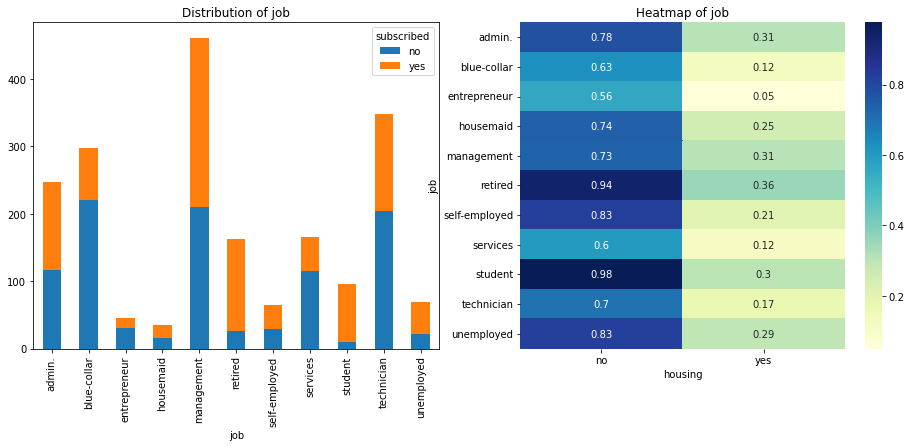

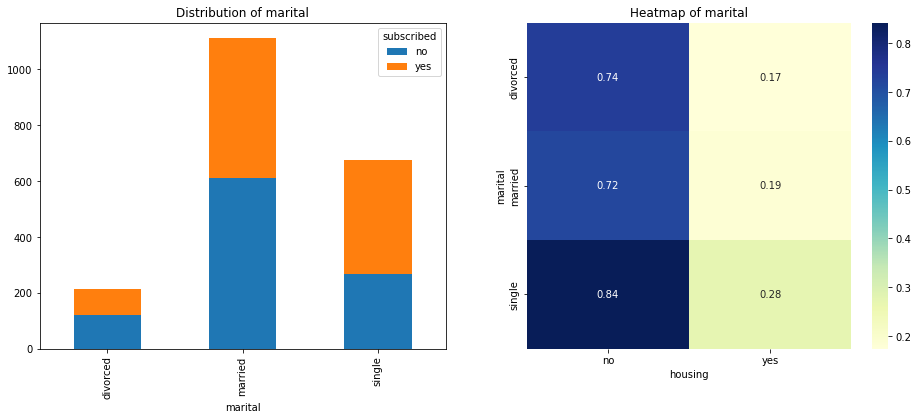

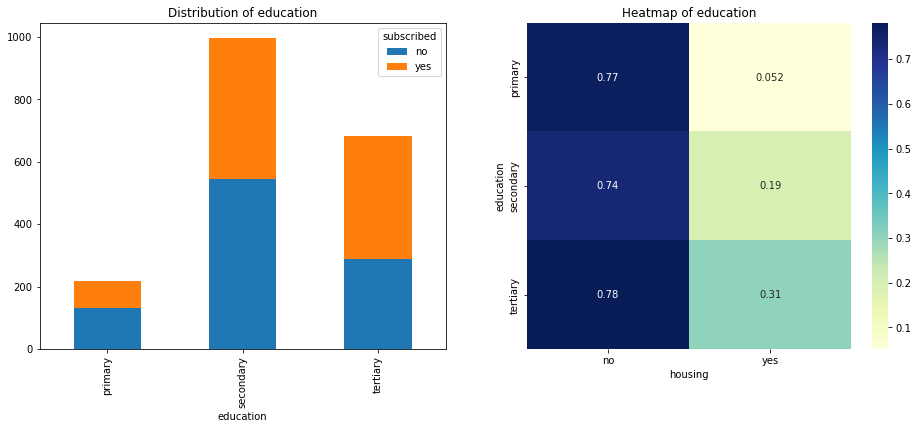

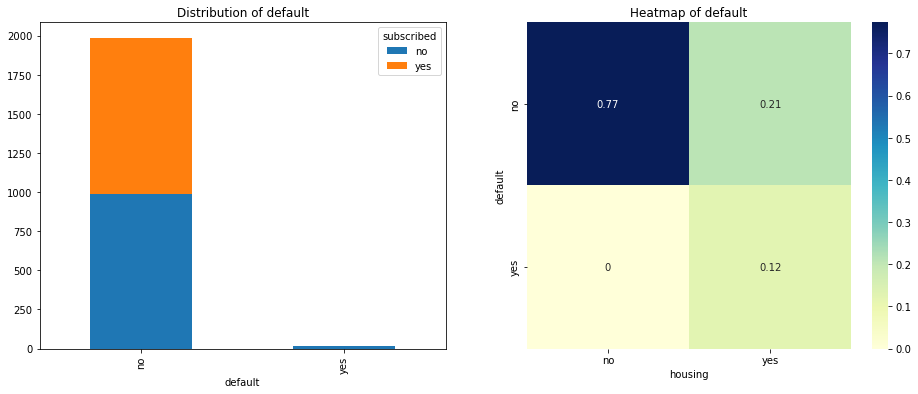

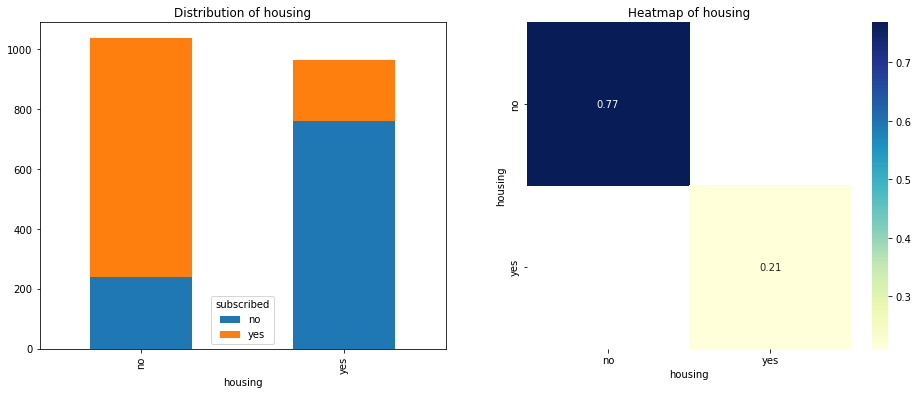

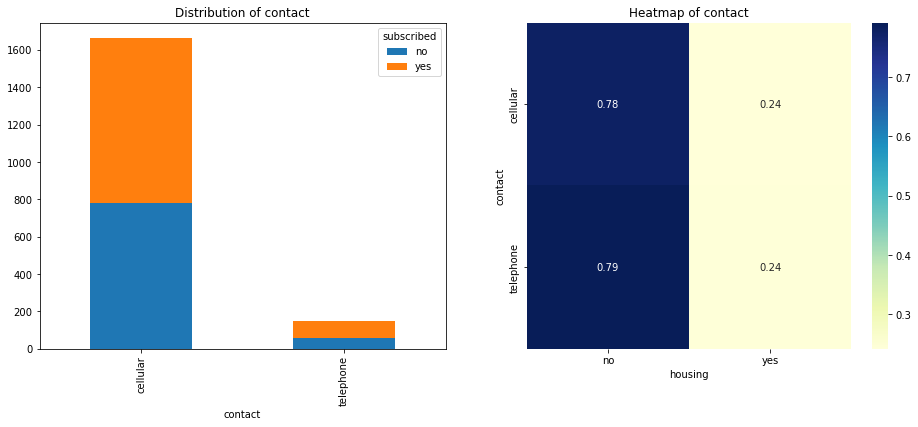

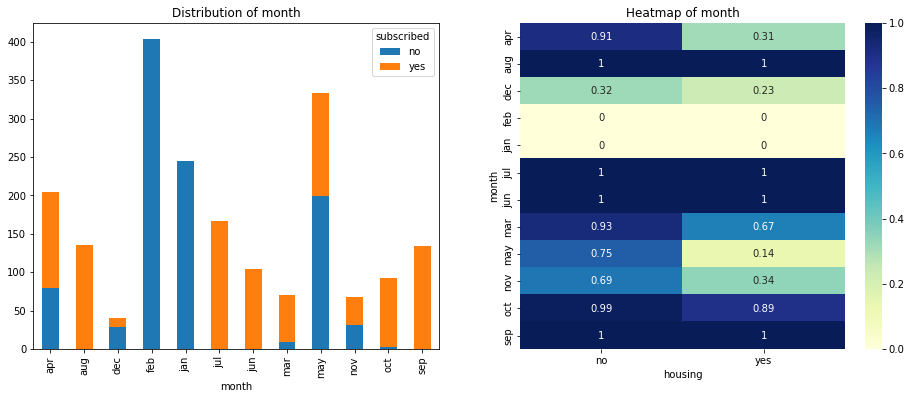

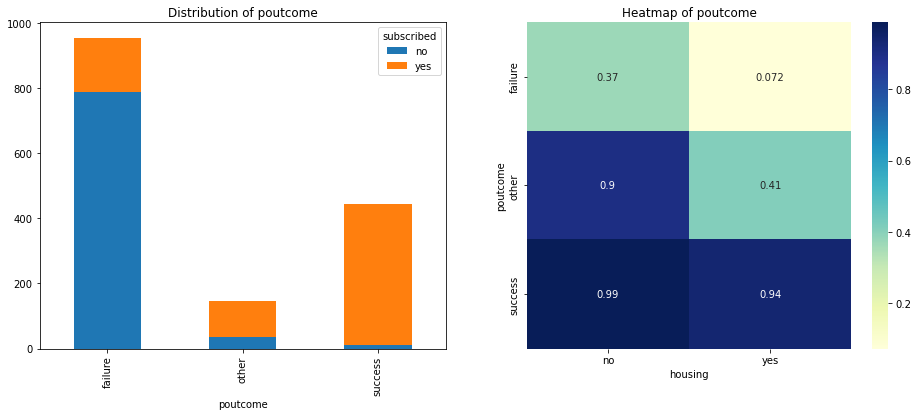

In [22]:
categorical_feature = ['job', 'marital', 'education', 'default', 'housing','contact', 'month', 'poutcome']
for i in categorical_feature:
    feature_explotation_cat(bank, i)

## Conclusion 
On first view there seems to be relatively high correlation between the certain features with in categorical data and those who subscribed to the term deposit.  

First of all you can see students and retired account holders who have no housing are almost certain to sign on to the term deposit. you can also see from the heatmap, that those who have no housing are more likely to sign on to the term deposit. This may be because they do not have any mortgage repayments which would be eating into their free cash. This means by targeting those who have no housing will result in a greater return on the marketing campaign. So we can increase sign on while decreasing resources spent.  

The month plots show there is some seasonality to the subscriptions, it seems that february and january are dead months. Aka there is no point in calling during these months but they make the highest number of calls during these months. I assume this is due to the post christmap blues, where people have less available cash to place in holding. By avoiding these months the bank will be able to save money. Thus increasing profits. I can also see that May and December have low success rates. It seems as though the best months for targeting customers are June, July, August, September, October. The bank could use this information to decrease costs. It could let go of some full time staff and replace them with part time staff during these key months. I wonder if they increased their targeting efforts during these months would they capture the same number of subscriptions?  

It's interesting to see that Poutcome has a very strong correlation with subscription success. This shows that customers who are known to actively engage with previous marketing campaigns are more likely to sign on for future campaigns. Therefore, if we continue to target those who have signed on to previous campaigns, we can target more efficiently and decrease costs. 